In [1]:
#install required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.wrappers.scikit_learn import KerasClassifier

#model evaluation packages
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

In [2]:
#read mnist fashion dataset
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
#reshape data from 3-D to 2-D array
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
#feature scaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
#fit and transform training dataset
X_train = minmax.fit_transform(X_train)
#transform testing dataset
X_test = minmax.transform(X_test)
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


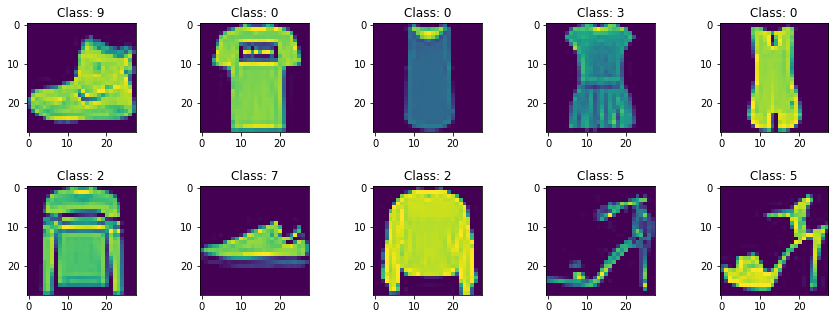

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

In [5]:
#initializing ANN model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(input_dim=X_train.shape[1], units=256, kernel_initializer='uniform', activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, kernel_initializer='uniform', activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
#fit training dataset into the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=0)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


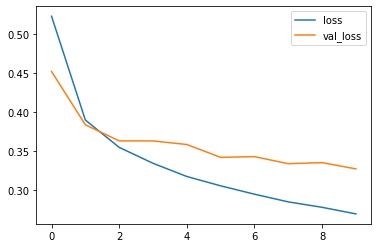

In [7]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

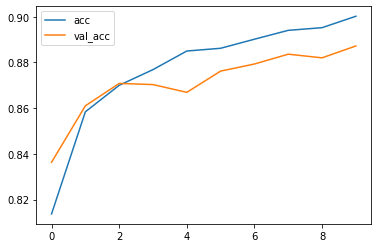

In [8]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [9]:
#evaluate the model for testing dataset
test_loss = model.evaluate(X_test, y_test, verbose=0)
#calculate evaluation parameters
f1_score = f1_score(y_test, model.predict_classes(X_test), average='micro')
roc_score = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovo')
#create evaluation dataframe
stats = pd.DataFrame({'Test accuracy' :  round(test_loss[1]*100,3),
                      'F1 score'      : round(f1_score,3),
                      'ROC AUC score' : round(roc_score,3),
                      'Total Loss'    : round(test_loss[0],3)}, index=[0])
#print evaluation dataframe
display(stats)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


,Test accuracy,F1 score,ROC AUC score,Total Loss
0,88.72,0.887,0.991,0.327
